<a href="https://colab.research.google.com/github/tarzan03/Fashhion_MNIST/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import ,division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

1.14.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(load_images,load_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
test_images = load_images
test_labels = load_labels

In [0]:
len(train_labels)

60000

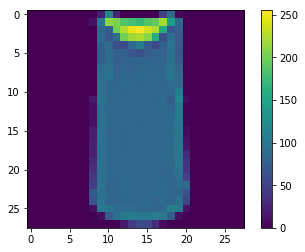

In [0]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images/255.0

test_images = test_images/255.0

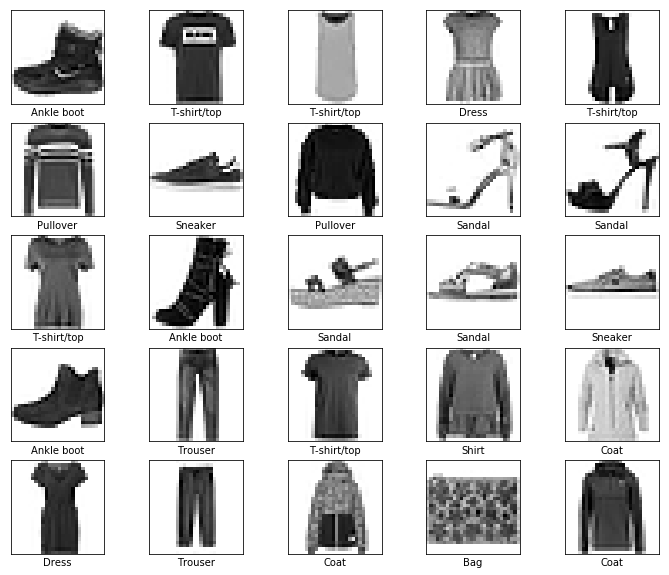

In [0]:
plt.figure(figsize = (12,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i] , cmap = plt.cm.binary)
    
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
train_labels[0:25]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4], dtype=uint8)

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128 ,activation = tf.nn.relu),
    keras.layers.Dense(10 ,activation = tf.nn.softmax)
    
])

In [0]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
model.fit(train_images,train_labels,epochs  = 5)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5011 - acc: 0.8234
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3776 - acc: 0.8631
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3386 - acc: 0.8773
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3140 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2960 - acc: 0.8921


In [0]:
test_loss , test_accuracy = model.evaluate(test_images , test_labels)

print('Test Accuracy:',test_accuracy)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3545 - acc: 0.8698
Test Accuracy: 0.8698


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([1.5005431e-05, 1.5245982e-08, 1.1208449e-05, 7.5829718e-07,
       6.5169211e-06, 8.8672908e-03, 3.6306235e-05, 1.1328839e-02,
       4.1222513e-05, 9.7969282e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
np.argmax(predictions[2])

1

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.xticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)
    
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    #true_label = int(true_label)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

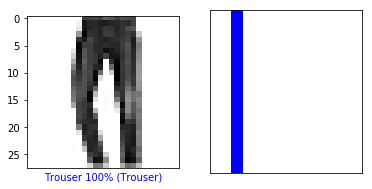

In [0]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

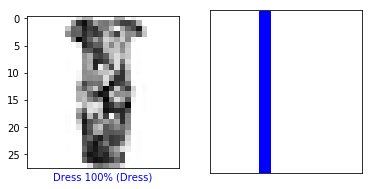

In [0]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

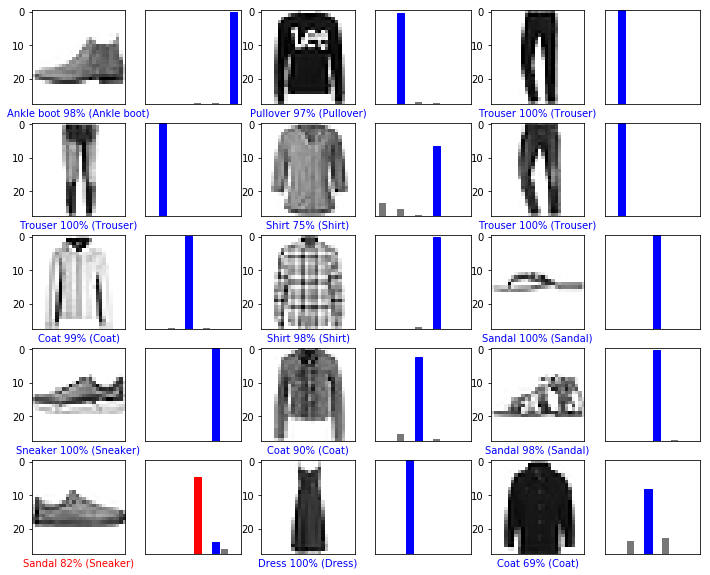

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()